<h1 align="center">Shopify Data Science Challenge</h1>


<p align="center">
    <img src="https://user-images.githubusercontent.com/63667951/133675379-6c703fd6-9910-4776-8483-b53b8c4ab28d.png" width="600" height="400" align=/>
</p>


## *Question 1*

### Problem

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### Load Packages

The pandas packages will be useful for visualizing the data in a dataframe and analyzing and manipulating the data.<br> 
I will be using the numpy package for performing arithmetic operations.<br>
I will be using the matplotlib package for creating visualizations of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [2]:
df = pd.read_csv(r"C:\Users\18632\Downloads\shopify_orders_2022.csv")
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


### Explore Data

In [3]:
df['order_amount'].sum()/df['order_id'].count()

3145.128

Currently, the Average order value is found by dividing the total number of orders by the grand total order amount, resulting in an AOV of $3,145.

However, this does not realistically reflect the average amount of dollars spent by each customer per order.

The data set contains 5000 rows and 7 columns.

In [4]:
df.shape

(5000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The data set does not contain any missing data, so there will be no need to do any imputations.

In [7]:
df.isnull().any()

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

Distribution for each numerical field is as follows:
- order_ID: There is a flat distribution here since each order id is unique. 5000 orders were placed among all of the customers 
- shop_id: The distribution is sporadic. There are 100 sneakshops and they each had different frequencies. 
- user_id: The user ids for each of the customers ranged from 700 to 1000.
- order_amount: The majority of the order amounts for each customer were quite small. 
- total_items: The majority of the total items purchased by the customers were also small.

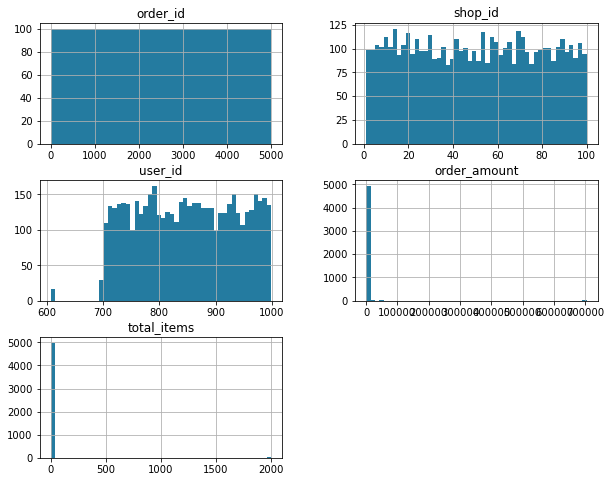

In [8]:
%matplotlib inline
plt.style.use('seaborn-muted')

df.hist(bins=50, figsize=(10,8),facecolor = '#247BA0', linewidth=0.5);


I want to take a closer look at the distribution of the order amount to identify any outliers in the data.

There are 301 customers.

In [9]:
df['user_id'].value_counts().count()

301

<a id=#order_amount_boxplot></a>

Using a box and whisker plot, we can see that most of the order amounts range from the high 100s to the high 300s. However, there are quite a few outliers that need further investigation as well.

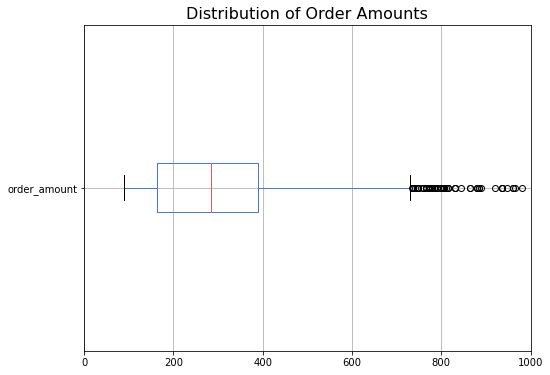

In [23]:
plt1 = df.boxplot(column=['order_amount'], vert=False, figsize=(8,6))
plt.title("Distribution of Order Amounts", size=16)
plt1.plot()
plt.xlim(xmin = 0, xmax = 1000);


Here is another box and whisker plot visualization further breaking down the order amounts by payment type is congruent with the information above.

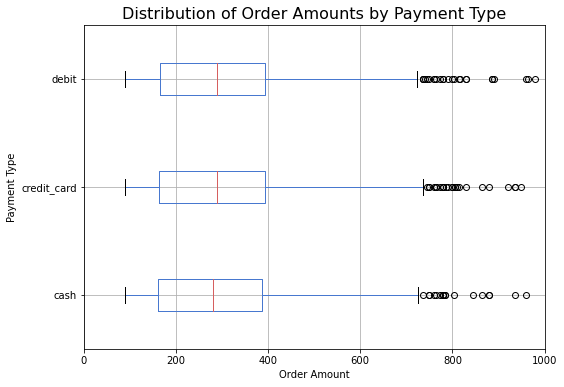

In [22]:
%matplotlib inline
plt1 = df.boxplot(column=['order_amount'], by=['payment_method'], vert=False, figsize=(8,6))
#plt.ylim(ymin = 0, ymax = 1000)
plt.xlabel("Order Amount")
plt.ylabel("Payment Type")
plt.title("Distribution of Order Amounts by Payment Type", size=16)
plt.suptitle("")
plt.xlim(xmin = 0, xmax = 1000)
plt1.plot();


The data in the order amount field needs further investigation of the outliers. First, I want to understand what is happening here.

I have filtered the field to only show amounts greater than $100,000. 

After carefully analyzing the data, there seem to be large transactions ordered by the customer_id 607. This could explain why the Average Order Amount is unexpectedly so high.


In [12]:
df[df['order_amount']>100000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


### Clean Data

The data does not need much wrangling aside from a couple of modifications below.

Currently, the 'created_at' column is a string data type. So I will convert this to a datetime type and make this a new column.

In [13]:
df['new_created_at'] = pd.to_datetime(df['created_at'])

To better understand the price of each item, I will calculate the item price and make this a new column.



In [14]:
df["item_price"] = (df['order_amount']/df['total_items'])
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,new_created_at,item_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14 04:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,2017-03-01 04:35:11,156.0
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,2017-03-19 05:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,2017-03-16 14:51:18,177.0


In [15]:
df['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

Next, I'm checking for duplicate values for the order id. There were no duplicate observations. Suppose there were duplicate order IDs. This could cause problems that would have resulted in a higher AOV. These would then have to be removed.

However, there are no duplicate items, as shown by the empty data frame below.

In [16]:
df[df.duplicated(['order_id'])]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,new_created_at,item_price


###  Solution

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

Answer: The Average Order Value is derived by taking the average of the order_amount. After exploring the data, we can see that there are some extreme outliers. For instance, there are 17 orders made by user_id 607 that are $700,000. Therefore, the orders are causing a skew in the Average Order Value, resulting in a higher than normal average.  Since these do not accurately reflect the average order amounts per customer transaction, we should not consider this metric to represent the AOV. 

b. What metric would you report for this dataset?

Answer:
A better metric for this data is the median. Since there are several outliers and the order amounts are not distributed normally, the median metric will not be sensitive to outliers.


c. What is its value?

Answer: The median for Order Amount is $284.

In [17]:
df['order_amount'].median()

284.0

To put this in perspective, over the last 30 days, the median for each order has been roughly \\$200 - 300. This supports the conclusion that $3,145 is not reflective of the order values.

In [18]:
df1 = df.groupby(pd.Grouper(key='new_created_at', freq='D')).median().reset_index()
df1[['new_created_at','order_amount']]

,new_created_at,order_amount
0,2017-03-01,280.0
1,2017-03-02,282.0
2,2017-03-03,282.0
3,2017-03-04,268.0
4,2017-03-05,292.0
5,2017-03-06,262.0
6,2017-03-07,270.0
7,2017-03-08,266.0
8,2017-03-09,306.0
9,2017-03-10,258.0


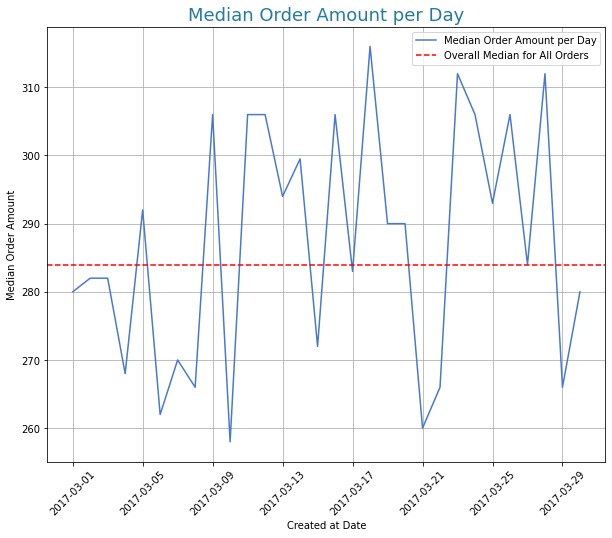

In [21]:
%matplotlib inline
plt.figure(figsize=(10,8))

plt.plot(df1['new_created_at'],df1['order_amount'], label="Median Order Amount per Day")
plt.xlabel("Created at Date")
plt.ylabel("Median Order Amount")
plt.title("Median Order Amount per Day", size=18, color ="#247BA0")
plt.xticks(rotation=45)
plt.grid(True)
median = np.median(df['order_amount'])
plt.axhline(median, color='r', linestyle='dashed', label="Overall Median for All Orders")
plt.legend()
plt.show();

## *Question 2*


For this question you’ll need to use SQL. Follow this [link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a.	How many orders were shipped by Speedy Express in total?

```SQL
    SELECT COUNT(t1.ShipperID)
    FROM Orders as t1
    JOIN Shippers as t2 ON t1.ShipperID = t2.ShipperID
    WHERE ShipperName = "Speedy Express"
```
    
    Answer: 54 orders were shipped by Speedy Express.


b.	What is the last name of the employee with the most orders?
    
```SQL    
    SELECT LastName, MAX(order_counts)
    FROM(
        SELECT t2.LastName, COUNT(*) AS order_counts
        FROM Orders as t1
        JOIN Employees as t2 ON t1.EmployeeID = t2.EmployeeID
        GROUP BY t2.EmployeeID
        )
```        
     Answer: Peacock had the most orders.
       

c.	What product was ordered the most by customers in Germany?
```SQL
    SELECT ProductName, MAX(count_of_products)
    FROM(
         SELECT *, COUNT(t1.ProductID) AS count_of_products
         FROM OrderDetails as t1
         JOIN Orders as t2 ON t1.OrderID = t2.OrderID
         JOIN Customers as t3 ON t2.CustomerID = t3.CustomerID
         JOIN Products as t4 ON t4.ProductID = t1.ProductID
         WHERE t3.Country = "Germany"
         GROUP BY t1.ProductID
      )
```      
      Answer: Gorgonzola Telino was ordered more frequently by customers.

